# ASSIGNMENT MARCOS N.

In [27]:
import sklearn
print("sklearn version : ",sklearn.__version__)
import numpy as np
print("numpy version : ",np.__version__)
import matplotlib as plt
print("matplotlib version : ",plt.__version__)
import pandas as pd
print("pandas version : ",pd.__version__)

#Version of libraries used



sklearn version :  0.22.1
numpy version :  1.18.1
matplotlib version :  3.1.3
pandas version :  1.0.1
sklearn version :  0.22.1
numpy version :  1.18.1
matplotlib version :  3.1.3
pandas version :  1.0.1


## Import data

In [28]:
df = pd.read_csv('/Users/marcosnegresaura/Downloads/processed.cleveland.data', header=None, delimiter = ",")
df.head()

#Remove non numerical values
df = df.replace('?', 0)
print(df)

       0    1    2      3      4    5    6      7    8    9    10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    0  3.0   

     13  
0     0  
1     2  
2     1  
3     0  
4

In [29]:
df_with_names = df.rename(columns={0: 'Age', 1: 'Sex', 2:'Cp', 3:'Trestbps', 4:'Chol', 5:'Fbs', 6:'Restecg', 7: 'Thalach', 
                       8: 'Exang', 9: 'Oldpeak', 10: 'Slope', 11: 'Ca', 12: 'Thal', 13: 'Num'})
df_with_names.head()



,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Import libraries 

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

## Normalize data

In [31]:
#Two options:
std_scaler = StandardScaler()

min_max_scaler = preprocessing.MinMaxScaler()

# std_scaler selected

# fit and transform the data
X = df[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values #returns a numpy array
y = df[[13]].values
y = y[:,0]


x_scaled = std_scaler.fit_transform(X)
X = x_scaled
print(X.shape)

(303, 13)


## Split data into training and test (test considerably small due to the scarcity of data)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(X_train)



(272, 13)
[[-0.4919187   0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.86542592]
 [ 1.05954533  0.68620244 -2.25177456 ...  0.64911323 -0.71113139
  -0.86542592]
 [-0.27028098  0.68620244  0.87798549 ...  0.64911323 -0.71113139
  -2.38998438]
 ...
 [-1.37846957  0.68620244  0.87798549 ... -0.97635214 -0.71113139
  -0.86542592]
 [-0.27028098  0.68620244 -1.20852121 ... -0.97635214 -0.71113139
  -0.86542592]
 [ 1.50282077  0.68620244 -0.16526786 ...  0.64911323 -0.71113139
   1.16731868]]



## K-means nearest neighbors



In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
KNeighborsClassifier()
knn.score(X_test, y_test)

0.6451612903225806

## Multi layer perceptron classifier (alpha set very big to prevent overfitting)

In [62]:
clf = MLPClassifier(random_state=1,alpha=5,
                     hidden_layer_sizes=(800, 6), max_iter=30000, ).fit(X_train, y_train)

clf.score(X_test, y_test)

0.6774193548387096

## Linear regression to analyze feature relevance

Feature: 0, Score: 0.18140
Feature: 1, Score: 0.23635
Feature: 2, Score: 0.49284
Feature: 3, Score: 0.19266
Feature: 4, Score: 0.02006
Feature: 5, Score: 0.04134
Feature: 6, Score: 0.22651
Feature: 7, Score: 0.31196
Feature: 8, Score: 0.29369
Feature: 9, Score: 0.53717
Feature: 10, Score: 0.25726
Feature: 11, Score: 1.00000
Feature: 12, Score: 0.60712


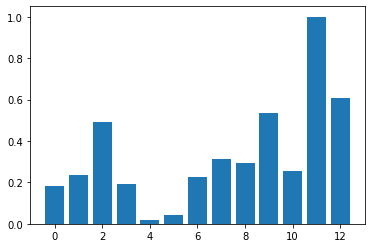

In [63]:

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance

importance = model.coef_
max_num = np.max(abs(importance))
importance = abs(importance/max_num)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance_linear = importance 

## Perceptron to analyze feature relevance

Feature: 0, Score: 0.02934
Feature: 1, Score: 0.43864
Feature: 2, Score: 1.00000
Feature: 3, Score: 0.57954
Feature: 4, Score: 0.49384
Feature: 5, Score: 0.45504
Feature: 6, Score: 0.25368
Feature: 7, Score: 0.41089
Feature: 8, Score: 0.35818
Feature: 9, Score: 0.22378
Feature: 10, Score: 0.04083
Feature: 11, Score: 0.62501
Feature: 12, Score: 0.29127


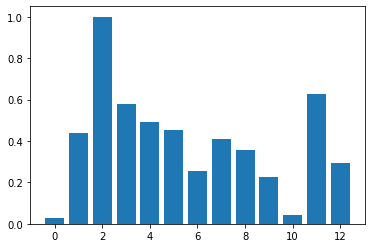

In [64]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

coeffs = clf.coef_
importance = coeffs[0]
max_num = np.max(abs(importance))

importance = abs(importance/max_num)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance_percept = importance 

Feature: 0, Score: 0.18375
Feature: 1, Score: 0.49826
Feature: 2, Score: 1.11485
Feature: 3, Score: 0.61072
Feature: 4, Score: 0.49425
Feature: 5, Score: 0.45691
Feature: 6, Score: 0.34009
Feature: 7, Score: 0.51590
Feature: 8, Score: 0.46319
Feature: 9, Score: 0.58192
Feature: 10, Score: 0.26048
Feature: 11, Score: 1.17925
Feature: 12, Score: 0.67338


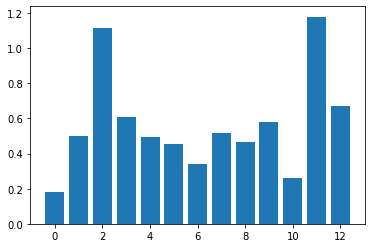

In [65]:
importance = np.sqrt(importance_percept**2 + importance_linear**2)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## L2 regularization in suport vector machine to down size the data dimensions

In [66]:
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)

print(X.shape)
X_new = model.transform(X)
print(X_new.shape)

(303, 13)
(303, 7)


Feature: 0, Score: 0.63801
Feature: 1, Score: 0.81632
Feature: 2, Score: 0.44542
Feature: 3, Score: 0.67387
Feature: 4, Score: 0.07518
Feature: 5, Score: 1.00000
Feature: 6, Score: 0.29784


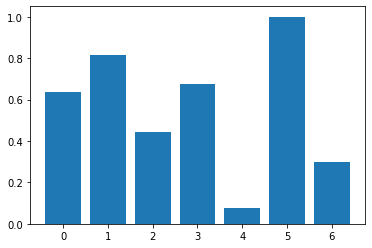

3.226625990646399


In [67]:
import numpy as np

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_new, y)

coeffs = clf.coef_
importance = coeffs[0]
max_num = np.max(abs(importance))

importance = abs(importance/max_num)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

print(max_num)

## Retrain the MLP model to see the impact of dimension reduction on performance

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1)
print(X_train.shape)
print(X_train)

(272, 7)
[[-1.4572959  -0.16526786  0.45507891 ...  0.31091206 -0.71113139
  -0.86542592]
 [-1.4572959  -1.20852121  0.41129075 ... -0.89686172  0.36087264
  -0.86542592]
 [ 0.68620244  0.87798549 -0.42068425 ...  0.13837295 -0.71113139
   1.16731868]
 ...
 [ 0.68620244 -0.16526786  0.71780786 ...  1.17360762 -0.71113139
  -0.86542592]
 [ 0.68620244 -0.16526786  0.58644339 ... -0.37924438  0.36087264
   1.16731868]
 [ 0.68620244 -2.25177456 -0.81477768 ... -0.81059216  0.36087264
  -0.86542592]]


In [69]:
print(X_train.shape)
clf = MLPClassifier(random_state=1, alpha=15,
                     hidden_layer_sizes=(800, 6), max_iter=30000).fit(X_train, y_train)
clf.score(X_test, y_test)

(272, 7)


0.5483870967741935